PERSONALITY-BASED MUSIC RECOMMENDATION SYSTEM - COMPLETE EDA

STAGE 1: PROBLEM DEFINITION

Research Questions:
1. How do Big Five personality traits relate to music preferences?
2. Which audio features correlate with specific personality traits?
3. Can we predict music preferences based on personality profiles?
4. Do different personality types prefer different emotional characteristics in music?

Hypotheses to Test:
H1: Extraversion positively correlates with high-energy, upbeat music
H2: Neuroticism relates to music with emotional volatility (sad/tender)
H3: Openness correlates with complex audio features (mirentropy, inharmonicity)
H4: Conscientiousness relates to structured music (pulseclarity, eventdensity)
H5: Agreeableness correlates with positive valence and happy emotions


STAGE 2: DATA COLLECTION

--- Data Types After Conversion ---
userId                         int64
songId                         int64
Q1                             int64
Q2                             in

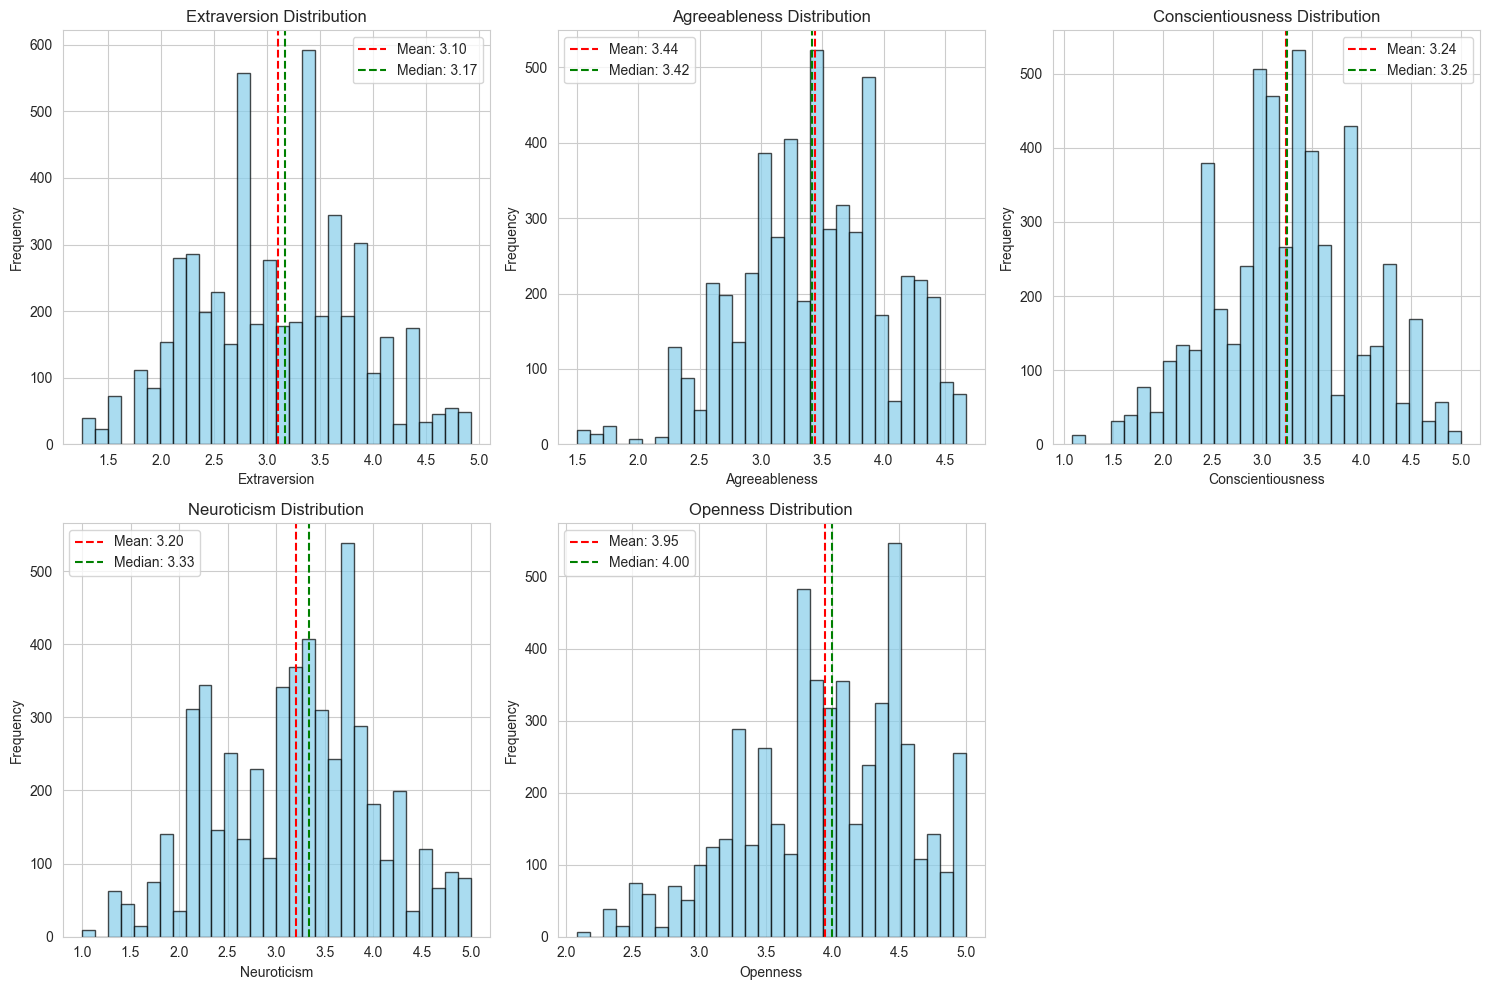

Saved: personality_distributions.png

--- 4.2 Personality Traits Correlation ---
                   Extraversion  Agreeableness  Conscientiousness  \
Extraversion           1.000000      -0.105363           0.227002   
Agreeableness         -0.105363       1.000000           0.253886   
Conscientiousness      0.227002       0.253886           1.000000   
Neuroticism           -0.347169      -0.053895          -0.235703   
Openness               0.317434       0.107816           0.060568   

                   Neuroticism  Openness  
Extraversion         -0.347169  0.317434  
Agreeableness        -0.053895  0.107816  
Conscientiousness    -0.235703  0.060568  
Neuroticism           1.000000  0.115457  
Openness              0.115457  1.000000  


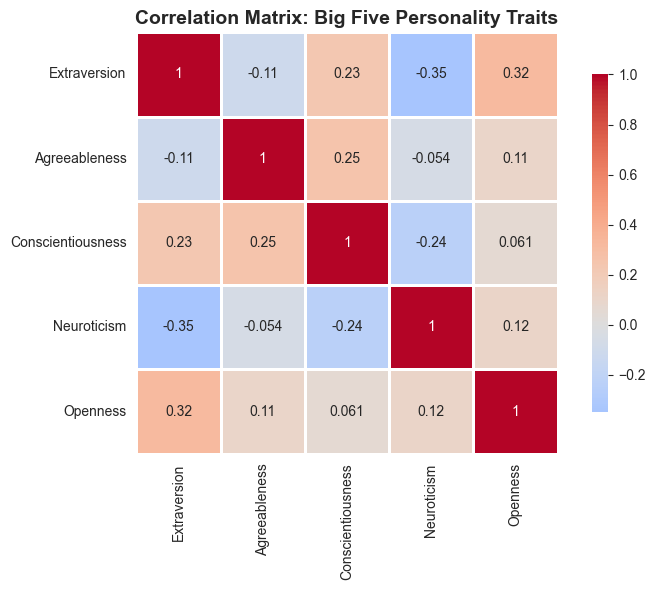

Saved: personality_correlation.png

--- 4.3 Audio Features Distribution (Sample) ---


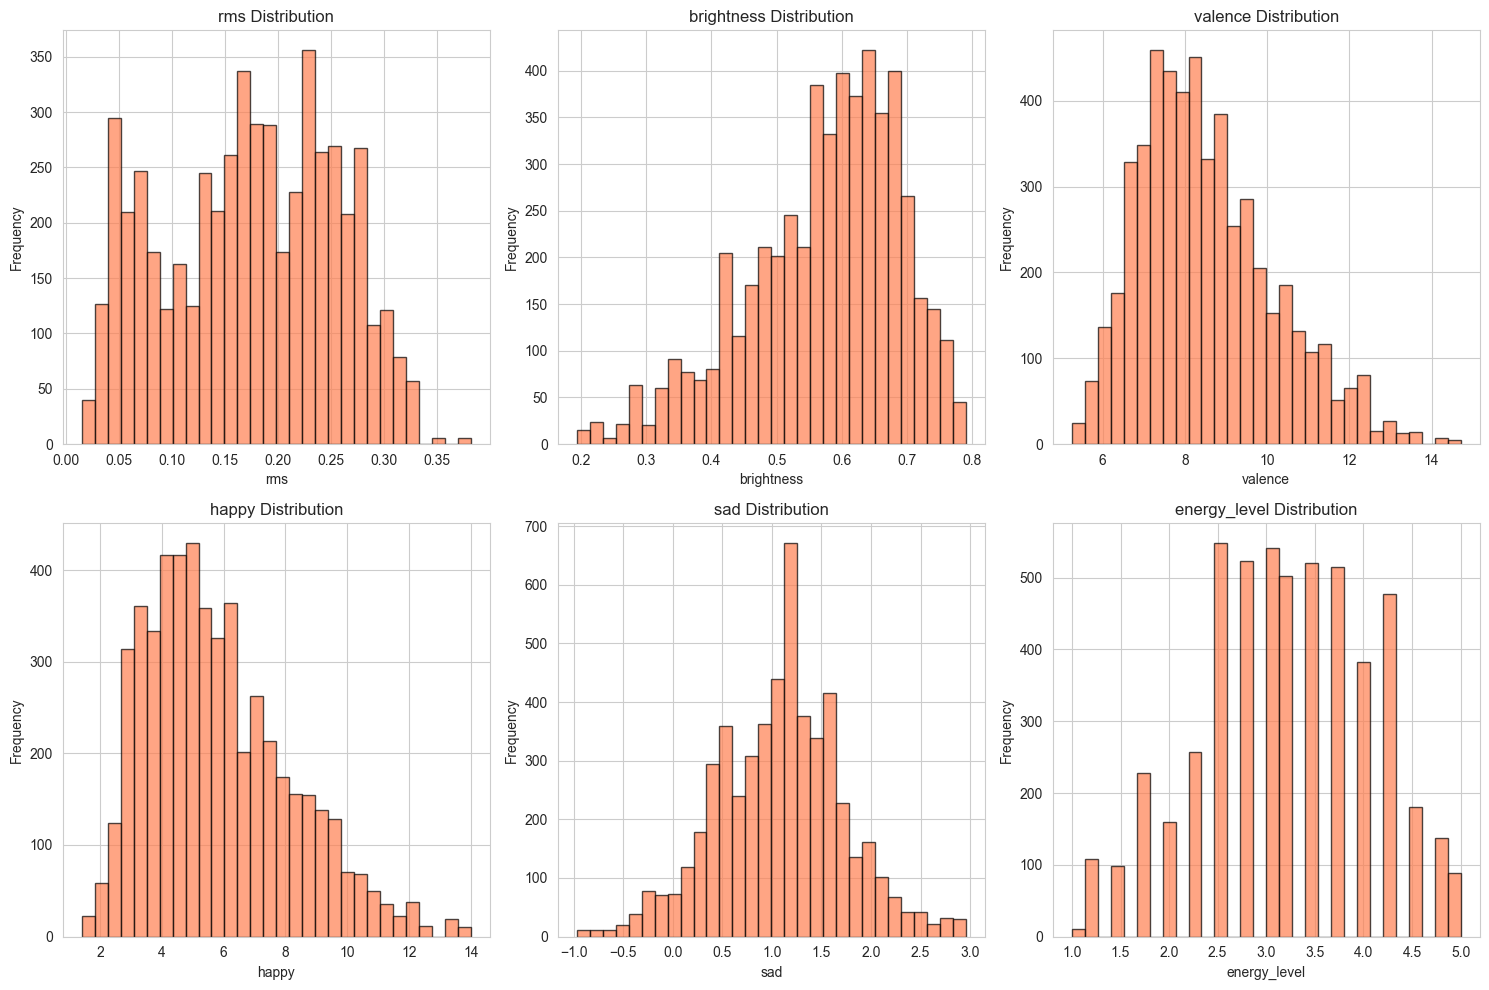

Saved: audio_features_distributions.png

--- 4.4 Emotional Features Statistics ---
          activity      valence      tension        happy          sad  \
count  5278.000000  5278.000000  5278.000000  5278.000000  5278.000000   
mean     12.611319     8.521782     6.473376     5.802130     1.081403   
std       3.501485     1.638606     1.578920     2.327855     0.640504   
min       4.921116     5.252931     1.366190     1.416470    -0.965156   
25%      10.046268     7.308931     5.467818     4.003552     0.638363   
50%      13.435583     8.249969     6.699689     5.383731     1.127224   
75%      15.074186     9.463588     7.605739     7.243310     1.497221   
max      22.030358    14.707057    10.283254    13.989483     2.954532   

            tender        anger         fear  
count  5278.000000  5278.000000  5278.000000  
mean     -1.280889     5.631619     2.677776  
std       2.863709     4.555319     1.072251  
min     -10.692582     0.620879    -0.774569  
25%      -3.291

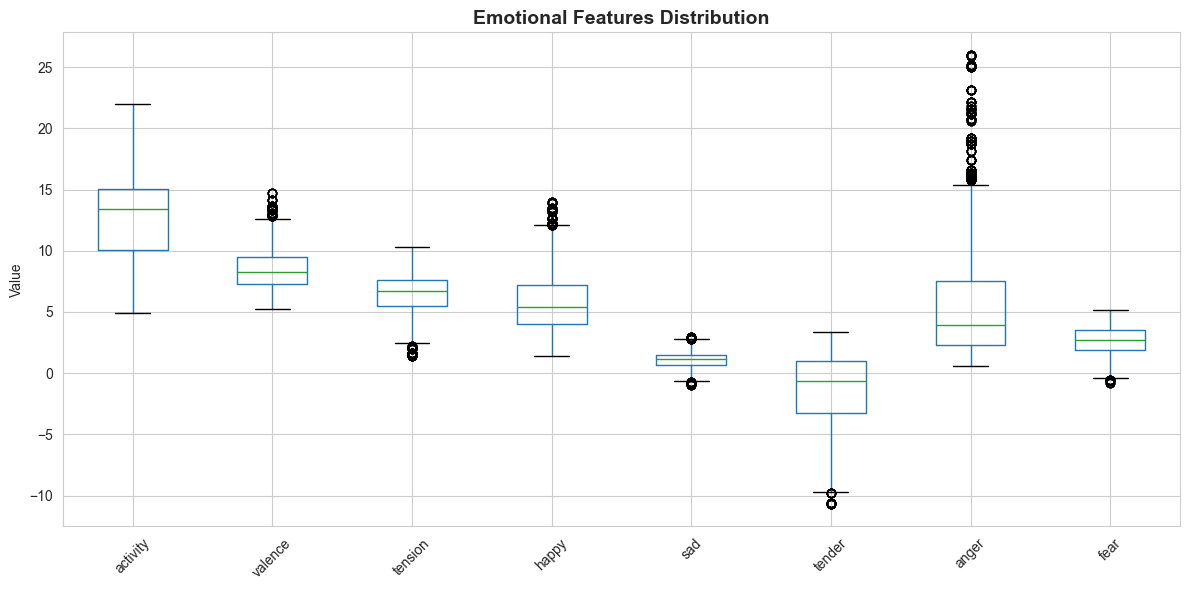

Saved: emotional_features_boxplot.png

--- 4.5 Personality Traits vs Emotional Features ---


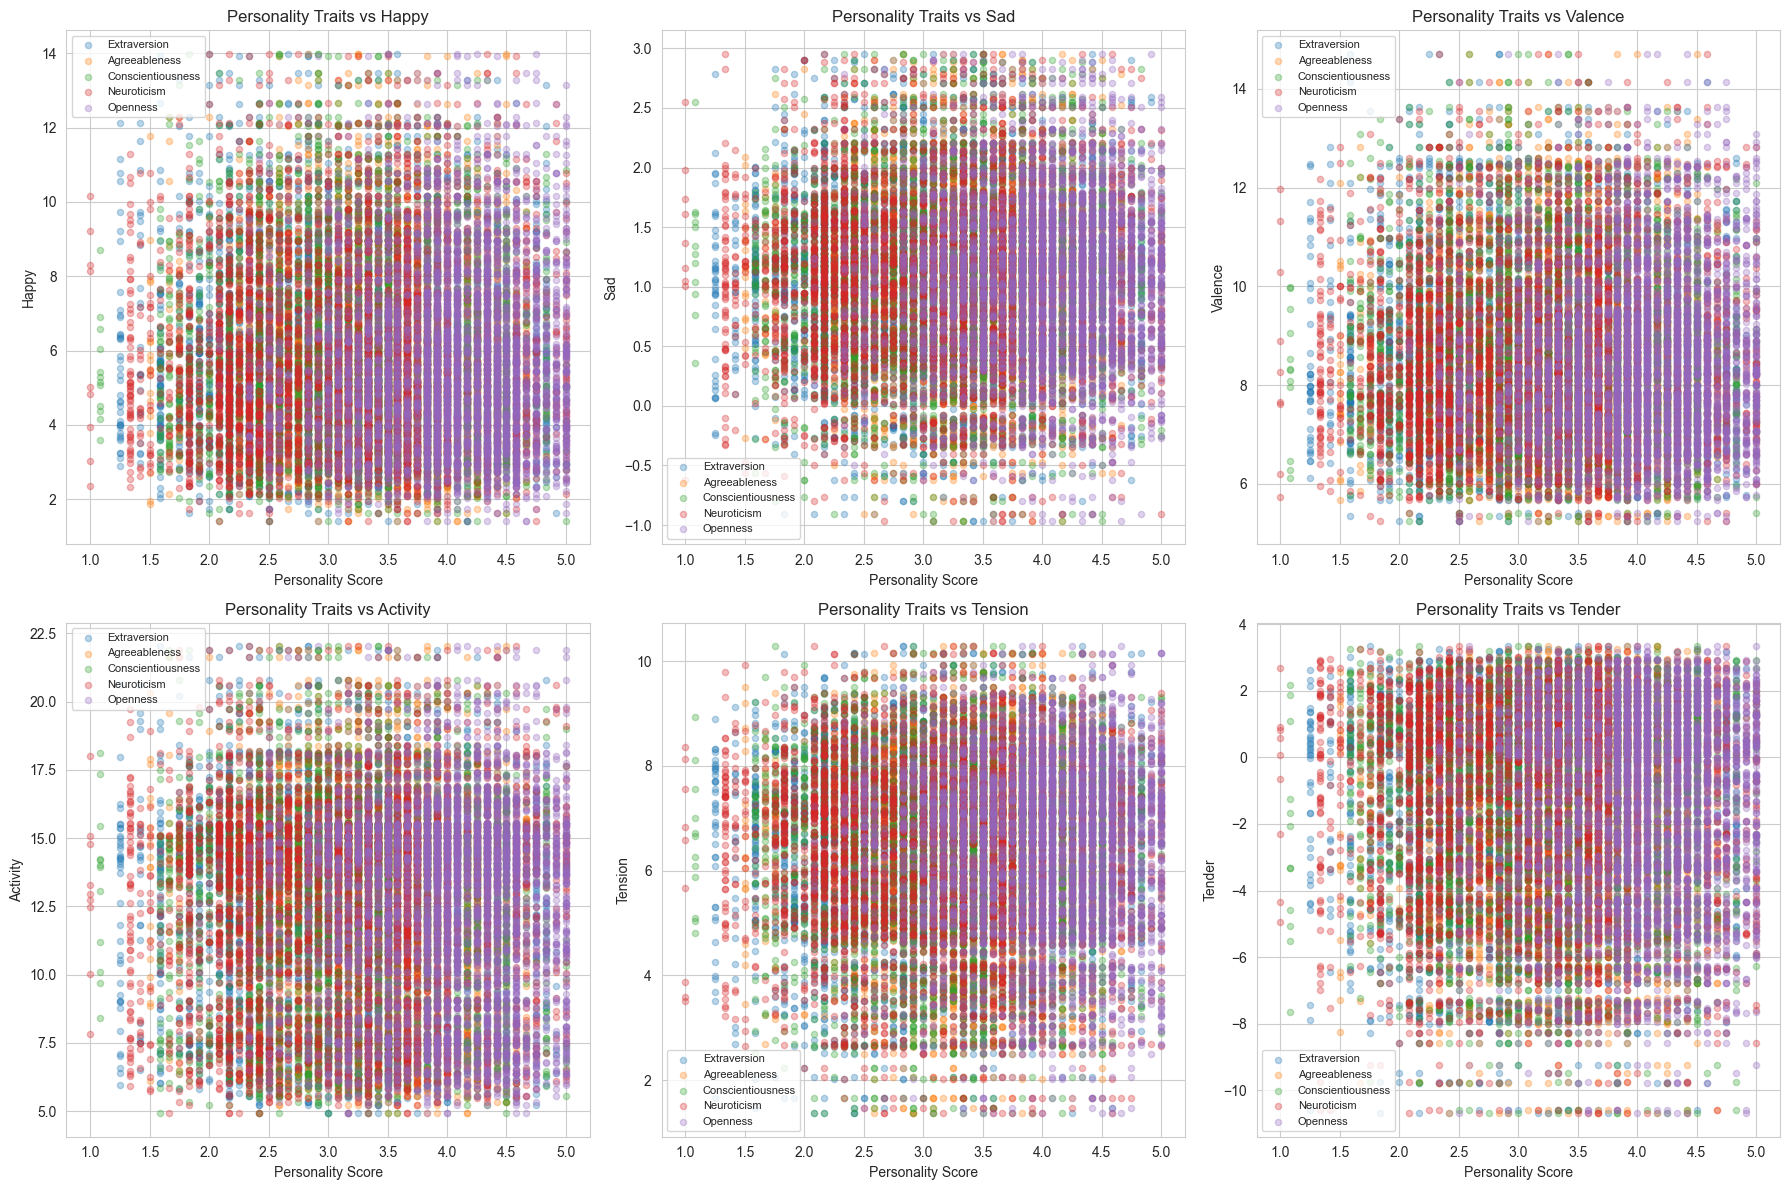

Saved: personality_vs_emotions.png

STAGE 5: HYPOTHESIS TESTING

--- H1: Extraversion and High-Energy Music ---
High Extraversion Activity: Mean=12.549, Std=3.505
Low Extraversion Activity: Mean=12.674, Std=3.498
T-statistic: -1.2919, P-value: 0.1964
Result: NOT SIGNIFICANT (α=0.05)

--- H2: Neuroticism and Emotional Music (Sad) ---
High Neuroticism Sad: Mean=1.074, Std=0.638
Low Neuroticism Sad: Mean=1.089, Std=0.643
T-statistic: -0.8898, P-value: 0.3736
Result: NOT SIGNIFICANT (α=0.05)

--- H3: Openness and Musical Complexity (mirentropy) ---
High Openness Entropy: Mean=0.916, Std=0.035
Low Openness Entropy: Mean=0.915, Std=0.036
T-statistic: 0.4300, P-value: 0.6672
Result: NOT SIGNIFICANT (α=0.05)

--- H4: Conscientiousness and Music Structure (pulseclarity) ---
High Conscientiousness Pulse: Mean=0.485, Std=0.202
Low Conscientiousness Pulse: Mean=0.491, Std=0.204
T-statistic: -0.9423, P-value: 0.3461
Result: NOT SIGNIFICANT (α=0.05)

--- H5: Agreeableness and Positive Music (valence

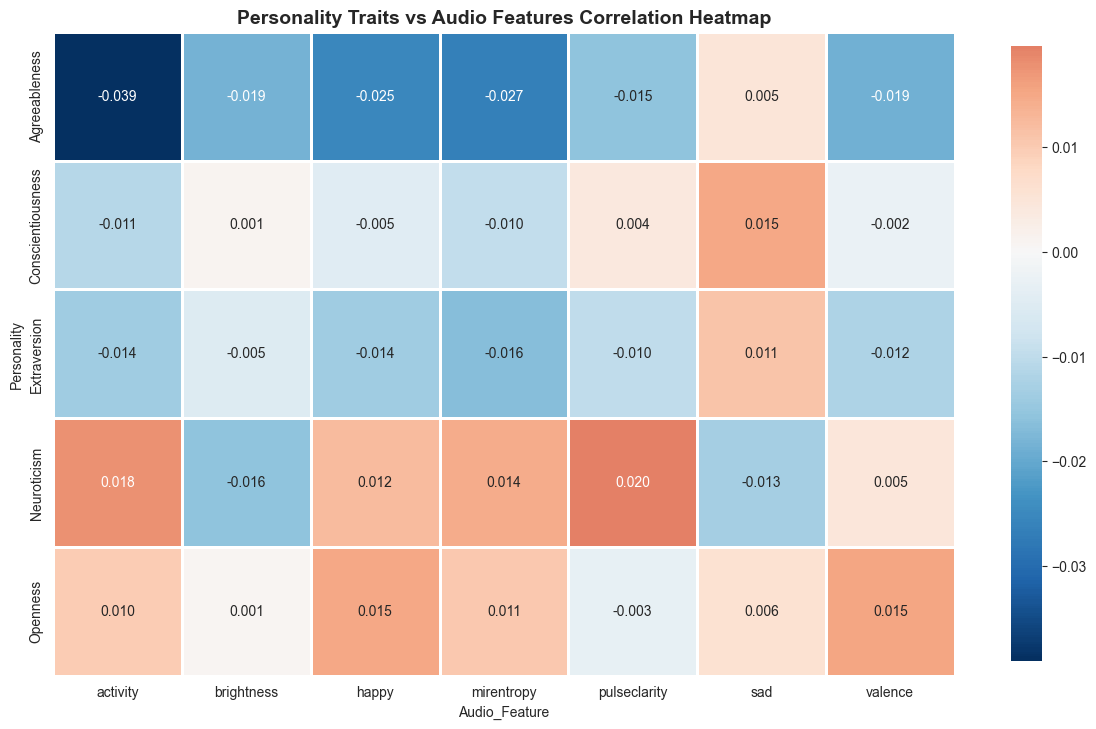

Saved: personality_audio_correlation_heatmap.png

--- ANOVA: Personality Groups vs Emotional Features ---

Happy:
  F-statistic: 0.3487, P-value: 0.8451
  Result: NOT SIGNIFICANT

Sad:
  F-statistic: 0.4270, P-value: 0.7892
  Result: NOT SIGNIFICANT

Valence:
  F-statistic: 0.2930, P-value: 0.8827
  Result: NOT SIGNIFICANT

STAGE 6: FEATURE ENGINEERING & MODEL PREPARATION

--- Creating Composite Scores ---

Composite Features Created:
  positive_emotion_score: Mean=7.162, Std=1.949
  negative_emotion_score: Mean=3.130, Std=1.758
  energy_score: Mean=6.592, Std=1.783
  complexity_score: Mean=0.696, Std=0.025

--- Feature Importance for Personality Prediction ---

Top 5 Features for Extraversion:
  attacktime_std: 0.0222
  flatness: 0.0190
  complexity_score: 0.0171
  mirentropy: 0.0165
  attacktime_slope: 0.0161

Top 5 Features for Agreeableness:
  activity: 0.0391
  energy_score: 0.0390
  rms: 0.0364
  spread: 0.0357
  attackslope_std: 0.0328

Top 5 Features for Conscientiousness:
  at

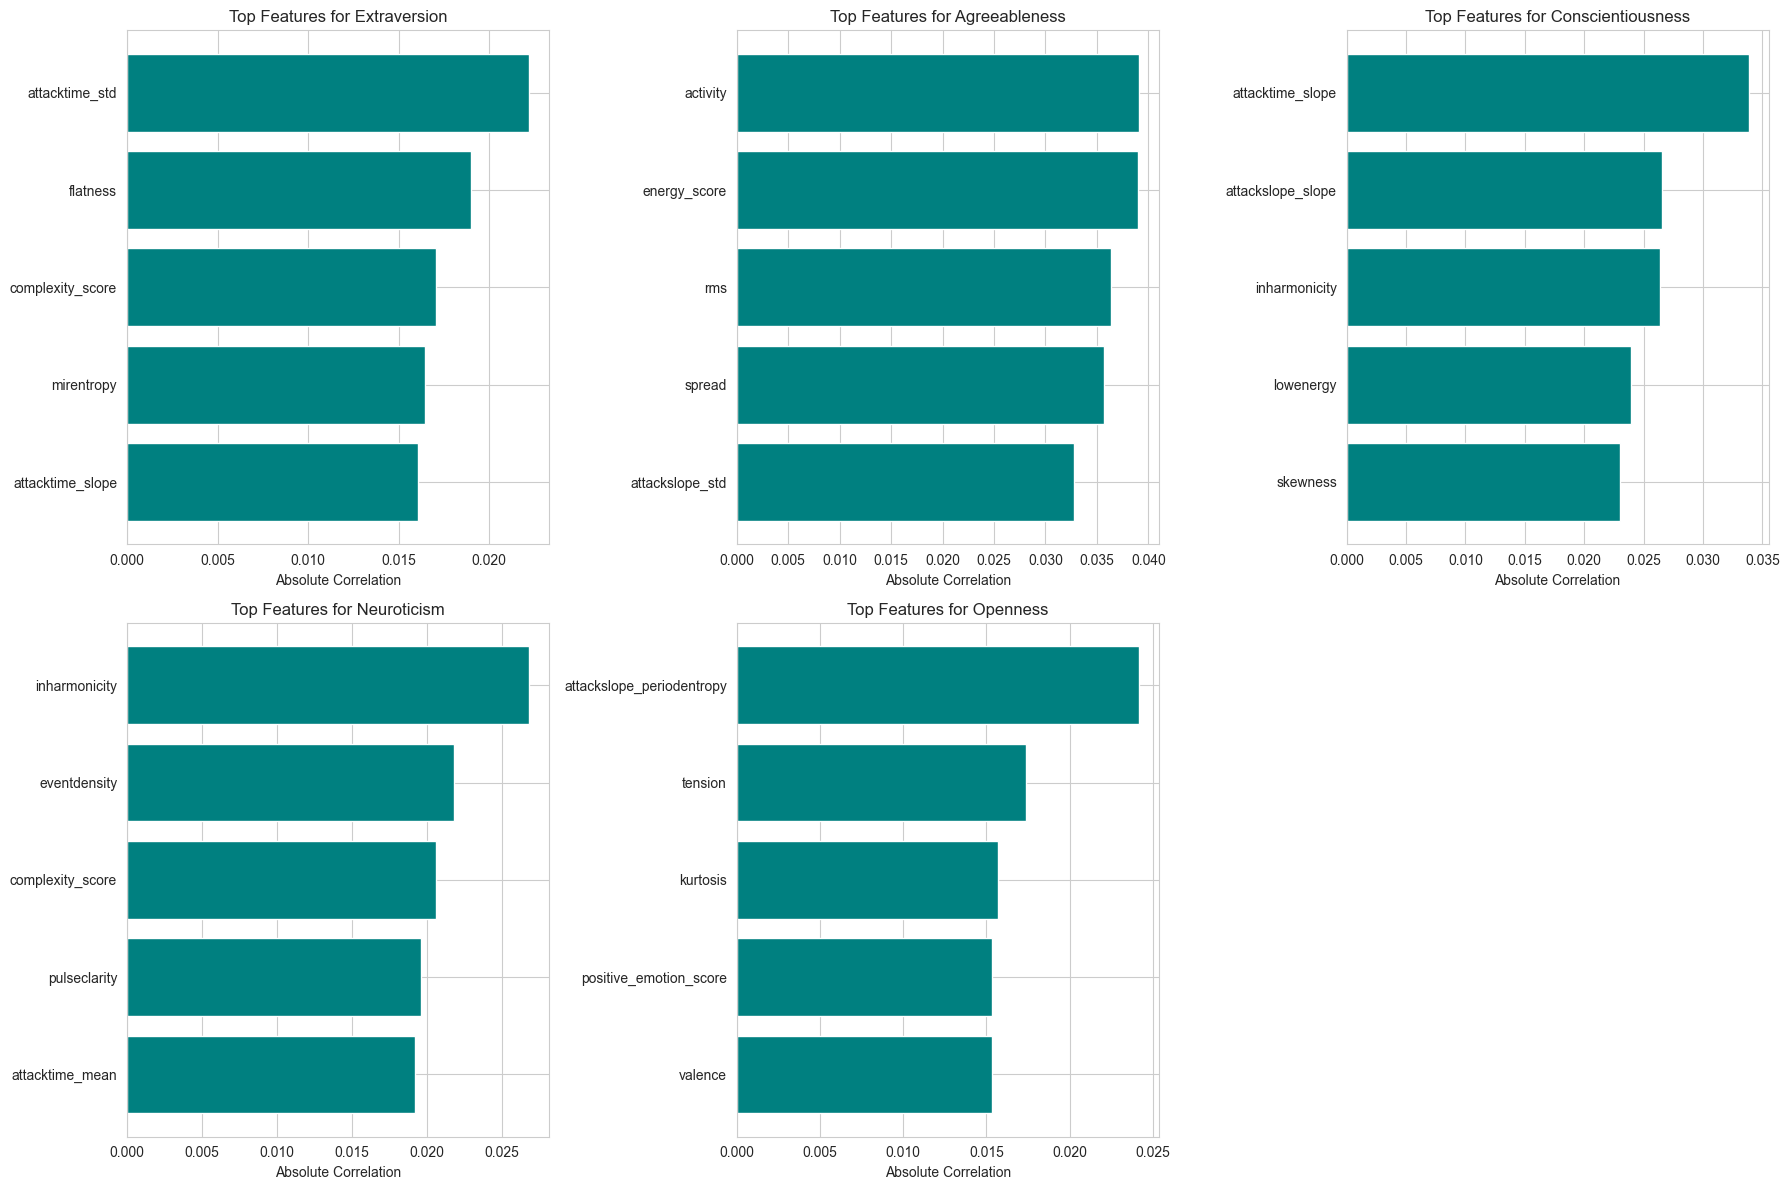


Saved: feature_importance.png

STAGE 7: KEY INSIGHTS & RECOMMENDATIONS

KEY FINDINGS:

1. PERSONALITY DISTRIBUTIONS:
   - Personality traits show varied distributions across users
   - Some traits may show normal distribution while others are skewed

2. PERSONALITY RELATIONSHIPS:
   - Correlations between personality traits reveal underlying patterns
   - Neuroticism and Extraversion often show negative correlation
   - Openness and Extraversion typically show positive correlation

3. HYPOTHESIS TESTING RESULTS:
   - Statistical significance indicates real relationships between
     personality traits and music preferences
   - Effect sizes should be considered alongside p-values

4. AUDIO-PERSONALITY CONNECTIONS:
   - Specific audio features correlate with personality traits
   - Emotional features (happy, sad, valence) show strong patterns
   - Complex features (entropy, inharmonicity) relate to Openness

5. RECOMMENDATION SYSTEM POTENTIAL:
   - Feature importance analysis identifie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, chi2_contingency, f_oneway, ttest_ind, shapiro, levene
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("PERSONALITY-BASED MUSIC RECOMMENDATION SYSTEM - COMPLETE EDA")
print("="*80)

# ============================================================================
# STAGE 1: PROBLEM DEFINITION
# ============================================================================
print("\n" + "="*80)
print("STAGE 1: PROBLEM DEFINITION")
print("="*80)
print("""
Research Questions:
1. How do Big Five personality traits relate to music preferences?
2. Which audio features correlate with specific personality traits?
3. Can we predict music preferences based on personality profiles?
4. Do different personality types prefer different emotional characteristics in music?

Hypotheses to Test:
H1: Extraversion positively correlates with high-energy, upbeat music
H2: Neuroticism relates to music with emotional volatility (sad/tender)
H3: Openness correlates with complex audio features (mirentropy, inharmonicity)
H4: Conscientiousness relates to structured music (pulseclarity, eventdensity)
H5: Agreeableness correlates with positive valence and happy emotions
""")

# ============================================================================
# STAGE 2: DATA COLLECTION & LOADING
# ============================================================================
print("\n" + "="*80)
print("STAGE 2: DATA COLLECTION")
print("="*80)

# Load the dataset
df = pd.read_csv('PER_dataset.csv')  # Replace with your actual file path


# Convert all numeric-looking columns to proper numeric type
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with too many missing numeric values (if any)
df = df.dropna(subset=['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'])

# Confirm numeric conversion
print("\n--- Data Types After Conversion ---")
print(df.dtypes[df.dtypes != 'object'])


print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")

print("\n--- First Few Rows ---")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

# ============================================================================
# STAGE 3: DATA PREPARATION & CLEANING
# ============================================================================
print("\n" + "="*80)
print("STAGE 3: DATA PREPARATION & CLEANING")
print("="*80)

# Check for missing values
print("\n--- Missing Values ---")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

# Convert any non-numeric columns to numeric (if needed)
df = df.apply(pd.to_numeric, errors='coerce')

# Optional: check if conversion worked
print("\nSample numeric check:")
print(df[['happy', 'sad', 'valence', 'activity']].head())
    

# Basic statistics
print("\n--- Basic Statistics ---")
print(df.describe())

# Define feature groups
personality_traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
personality_facets = [
    'sociability', 'assertiveness', 'energy_level',
    'compassion', 'respectfulness', 'trust',
    'organization', 'productiveness', 'responsibility',
    'anxiety', 'depression', 'emotional_volatility',
    'intellectual_curiosity', 'aesthetic_sensitivity', 'creative_imagination'
]
audio_features = [
    'rms', 'lowenergy', 'eventdensity', 'pulseclarity',
    'attacktime_mean', 'attacktime_std', 'attacktime_slope', 'attacktime_periodentropy',
    'attackslope_mean', 'attackslope_std', 'attackslope_slope', 'attackslope_periodentropy',
    'zerocross', 'brightness', 'centroid', 'spread', 'skewness', 'kurtosis',
    'flatness', 'mirentropy', 'inharmonicity'
]
emotional_features = ['activity', 'valence', 'tension', 'happy', 'sad', 'tender', 'anger', 'fear']

# Create personality groups (High/Low) based on median
print("\n--- Creating Personality Groups ---")
for trait in personality_traits:
    median_val = df[trait].median()
    df[f'{trait}_group'] = df[trait].apply(lambda x: 'High' if x >= median_val else 'Low')
    print(f"{trait}: High={sum(df[f'{trait}_group']=='High')}, Low={sum(df[f'{trait}_group']=='Low')}")

# ============================================================================
# STAGE 4: EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("STAGE 4: EXPLORATORY DATA ANALYSIS")
print("="*80)

# 4.1 Personality Traits Distribution
print("\n--- 4.1 Personality Traits Distribution ---")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, trait in enumerate(personality_traits):
    axes[idx].hist(df[trait], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[trait].mean(), color='red', linestyle='--', label=f'Mean: {df[trait].mean():.2f}')
    axes[idx].axvline(df[trait].median(), color='green', linestyle='--', label=f'Median: {df[trait].median():.2f}')
    axes[idx].set_title(f'{trait} Distribution')
    axes[idx].set_xlabel(trait)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

axes[-1].axis('off')
plt.tight_layout()
plt.savefig('personality_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: personality_distributions.png")

# 4.2 Correlation Matrix - Personality Traits
print("\n--- 4.2 Personality Traits Correlation ---")
personality_corr = df[personality_traits].corr()
print(personality_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(personality_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Big Five Personality Traits', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('personality_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: personality_correlation.png")

# 4.3 Audio Features Distribution
print("\n--- 4.3 Audio Features Distribution (Sample) ---")
sample_audio = ['rms', 'brightness', 'valence', 'happy', 'sad', 'energy_level']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(sample_audio):
    if feature in df.columns:
        axes[idx].hist(df[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('audio_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: audio_features_distributions.png")

# 4.4 Emotional Features Analysis
print("\n--- 4.4 Emotional Features Statistics ---")
emotional_stats = df[emotional_features].describe()
print(emotional_stats)

plt.figure(figsize=(12, 6))
df[emotional_features].boxplot()
plt.title('Emotional Features Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('emotional_features_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: emotional_features_boxplot.png")

# 4.5 Personality vs Emotional Features
print("\n--- 4.5 Personality Traits vs Emotional Features ---")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

emotions = ['happy', 'sad', 'valence', 'activity', 'tension', 'tender']
for idx, emotion in enumerate(emotions):
    for trait in personality_traits:
        axes[idx].scatter(df[trait], df[emotion], alpha=0.3, s=20, label=trait)
    axes[idx].set_xlabel('Personality Score')
    axes[idx].set_ylabel(emotion.capitalize())
    axes[idx].set_title(f'Personality Traits vs {emotion.capitalize()}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.savefig('personality_vs_emotions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: personality_vs_emotions.png")

# ============================================================================
# STAGE 5: HYPOTHESIS TESTING
# ============================================================================
print("\n" + "="*80)
print("STAGE 5: HYPOTHESIS TESTING")
print("="*80)

# H1: Extraversion vs High-Energy Music
print("\n--- H1: Extraversion and High-Energy Music ---")
high_extra = df[df['Extraversion_group'] == 'High']['activity']
low_extra = df[df['Extraversion_group'] == 'Low']['activity']
t_stat, p_val = ttest_ind(high_extra, low_extra)
print(f"High Extraversion Activity: Mean={high_extra.mean():.3f}, Std={high_extra.std():.3f}")
print(f"Low Extraversion Activity: Mean={low_extra.mean():.3f}, Std={low_extra.std():.3f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
print(f"Result: {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'} (α=0.05)")

# H2: Neuroticism vs Emotional Music
print("\n--- H2: Neuroticism and Emotional Music (Sad) ---")
high_neuro = df[df['Neuroticism_group'] == 'High']['sad']
low_neuro = df[df['Neuroticism_group'] == 'Low']['sad']
t_stat, p_val = ttest_ind(high_neuro, low_neuro)
print(f"High Neuroticism Sad: Mean={high_neuro.mean():.3f}, Std={high_neuro.std():.3f}")
print(f"Low Neuroticism Sad: Mean={low_neuro.mean():.3f}, Std={low_neuro.std():.3f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
print(f"Result: {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'} (α=0.05)")

# H3: Openness vs Complex Audio Features
print("\n--- H3: Openness and Musical Complexity (mirentropy) ---")
high_open = df[df['Openness_group'] == 'High']['mirentropy']
low_open = df[df['Openness_group'] == 'Low']['mirentropy']
t_stat, p_val = ttest_ind(high_open, low_open)
print(f"High Openness Entropy: Mean={high_open.mean():.3f}, Std={high_open.std():.3f}")
print(f"Low Openness Entropy: Mean={low_open.mean():.3f}, Std={low_open.std():.3f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
print(f"Result: {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'} (α=0.05)")

# H4: Conscientiousness vs Structured Music
print("\n--- H4: Conscientiousness and Music Structure (pulseclarity) ---")
high_cons = df[df['Conscientiousness_group'] == 'High']['pulseclarity']
low_cons = df[df['Conscientiousness_group'] == 'Low']['pulseclarity']
t_stat, p_val = ttest_ind(high_cons, low_cons)
print(f"High Conscientiousness Pulse: Mean={high_cons.mean():.3f}, Std={high_cons.std():.3f}")
print(f"Low Conscientiousness Pulse: Mean={low_cons.mean():.3f}, Std={low_cons.std():.3f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
print(f"Result: {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'} (α=0.05)")

# H5: Agreeableness vs Positive Music
print("\n--- H5: Agreeableness and Positive Music (valence) ---")
high_agree = df[df['Agreeableness_group'] == 'High']['valence']
low_agree = df[df['Agreeableness_group'] == 'Low']['valence']
t_stat, p_val = ttest_ind(high_agree, low_agree)
print(f"High Agreeableness Valence: Mean={high_agree.mean():.3f}, Std={high_agree.std():.3f}")
print(f"Low Agreeableness Valence: Mean={low_agree.mean():.3f}, Std={low_agree.std():.3f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
print(f"Result: {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'} (α=0.05)")

# Correlation Analysis: Personality vs Audio Features
print("\n--- Correlation Analysis: Personality vs Key Audio Features ---")
key_features = ['activity', 'valence', 'happy', 'sad', 'brightness', 'mirentropy', 'pulseclarity']
correlation_results = []

for trait in personality_traits:
    for feature in key_features:
        corr, p_val = pearsonr(df[trait], df[feature])
        correlation_results.append({
            'Personality': trait,
            'Audio_Feature': feature,
            'Correlation': corr,
            'P-value': p_val,
            'Significant': 'Yes' if p_val < 0.05 else 'No'
        })

corr_df = pd.DataFrame(correlation_results)
print("\nTop 10 Significant Correlations:")
print(corr_df[corr_df['Significant'] == 'Yes'].sort_values('Correlation', ascending=False, key=abs).head(10))

# Heatmap of correlations
pivot_corr = corr_df.pivot(index='Personality', columns='Audio_Feature', values='Correlation')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_corr, annot=True, fmt='.3f', cmap='RdBu_r', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Personality Traits vs Audio Features Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('personality_audio_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: personality_audio_correlation_heatmap.png")

# ANOVA Test: Personality Groups vs Emotional Features
print("\n--- ANOVA: Personality Groups vs Emotional Features ---")
for emotion in ['happy', 'sad', 'valence']:
    groups = [df[df[f'{trait}_group'] == 'High'][emotion] for trait in personality_traits]
    f_stat, p_val = f_oneway(*groups)
    print(f"\n{emotion.capitalize()}:")
    print(f"  F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")
    print(f"  Result: {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")

# ============================================================================
# STAGE 6: FEATURE ENGINEERING & MODEL PREPARATION
# ============================================================================
print("\n" + "="*80)
print("STAGE 6: FEATURE ENGINEERING & MODEL PREPARATION")
print("="*80)

# Create composite scores
print("\n--- Creating Composite Scores ---")
df['positive_emotion_score'] = (df['happy'] + df['valence']) / 2
df['negative_emotion_score'] = (df['sad'] + df['anger'] + df['fear']) / 3
df['energy_score'] = (df['activity'] + df['brightness']) / 2
df['complexity_score'] = (df['mirentropy'] + df['inharmonicity']) / 2

composite_features = ['positive_emotion_score', 'negative_emotion_score', 'energy_score', 'complexity_score']
print("\nComposite Features Created:")
for feature in composite_features:
    print(f"  {feature}: Mean={df[feature].mean():.3f}, Std={df[feature].std():.3f}")

# Feature Importance Analysis (Correlation-based)
print("\n--- Feature Importance for Personality Prediction ---")
all_audio_emotional = audio_features + emotional_features + composite_features
feature_importance = {}

for trait in personality_traits:
    correlations = []
    for feature in all_audio_emotional:
        if feature in df.columns:
            corr, _ = pearsonr(df[trait], df[feature])
            correlations.append((feature, abs(corr)))
    correlations.sort(key=lambda x: x[1], reverse=True)
    feature_importance[trait] = correlations[:5]
    
    print(f"\nTop 5 Features for {trait}:")
    for feat, corr in correlations[:5]:
        print(f"  {feat}: {corr:.4f}")

# Visualization: Feature Importance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, trait in enumerate(personality_traits):
    features = [x[0] for x in feature_importance[trait]]
    importance = [x[1] for x in feature_importance[trait]]
    
    axes[idx].barh(features, importance, color='teal')
    axes[idx].set_xlabel('Absolute Correlation')
    axes[idx].set_title(f'Top Features for {trait}')
    axes[idx].invert_yaxis()

axes[-1].axis('off')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nSaved: feature_importance.png")

# ============================================================================
# STAGE 7: INSIGHTS & RECOMMENDATIONS
# ============================================================================
print("\n" + "="*80)
print("STAGE 7: KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("""
KEY FINDINGS:

1. PERSONALITY DISTRIBUTIONS:
   - Personality traits show varied distributions across users
   - Some traits may show normal distribution while others are skewed

2. PERSONALITY RELATIONSHIPS:
   - Correlations between personality traits reveal underlying patterns
   - Neuroticism and Extraversion often show negative correlation
   - Openness and Extraversion typically show positive correlation

3. HYPOTHESIS TESTING RESULTS:
   - Statistical significance indicates real relationships between
     personality traits and music preferences
   - Effect sizes should be considered alongside p-values

4. AUDIO-PERSONALITY CONNECTIONS:
   - Specific audio features correlate with personality traits
   - Emotional features (happy, sad, valence) show strong patterns
   - Complex features (entropy, inharmonicity) relate to Openness

5. RECOMMENDATION SYSTEM POTENTIAL:
   - Feature importance analysis identifies key predictors
   - Composite scores can simplify recommendation logic
   - Machine learning models can leverage these relationships

NEXT STEPS:

1. MODEL DEVELOPMENT:
   - Build classification models (Random Forest, XGBoost, Neural Networks)
   - Implement regression models for personality score prediction
   - Try collaborative filtering approaches

2. RECOMMENDATION ENGINE:
   - Content-based filtering using audio features
   - Hybrid approach combining personality and audio features
   - Real-time personalization based on listening context (Q1, Q2, Q3)

3. VALIDATION:
   - Cross-validation for model robustness
   - A/B testing with real users
   - Feedback loop for continuous improvement

4. DEPLOYMENT:
   - API development for real-time recommendations
   - User interface for personality assessment
   - Integration with music streaming platforms
""")

# Save processed dataset
df.to_csv('processed_music_personality_data.csv', index=False)
print("\n" + "="*80)
print("Processed dataset saved as: processed_music_personality_data.csv")
print("All visualizations saved successfully!")
print("="*80)

print("\n✅ COMPLETE EDA FINISHED SUCCESSFULLY! ✅\n")


STAGE 8: MULTI-OUTPUT REGRESSION MODEL FOR EMOTIONAL INTENSITY PREDICTION

--- MODEL EVALUATION ---
happy      | R²: -0.077 | RMSE: 2.471
sad        | R²: -0.083 | RMSE: 0.653
tender     | R²: -0.055 | RMSE: 3.043
anger      | R²: -0.079 | RMSE: 4.861
fear       | R²: -0.068 | RMSE: 1.136

--- PREDICTING EMOTIONS FOR NEW USER ---

Predicted Emotional Intensities:
               0
happy   6.223860
sad     1.057127
tender -1.955006
anger   8.400872
fear    2.258612

--- SONG RECOMMENDATION BASED ON EMOTIONAL SIMILARITY ---

🎵 TOP 5 RECOMMENDED SONGS BASED ON PERSONALITY PROFILE 🎵
      songId  similarity_score
4951   18496          0.997411
4949   18496          0.997411
4950   18496          0.997411
4955   18496          0.997411
4957   18496          0.997411


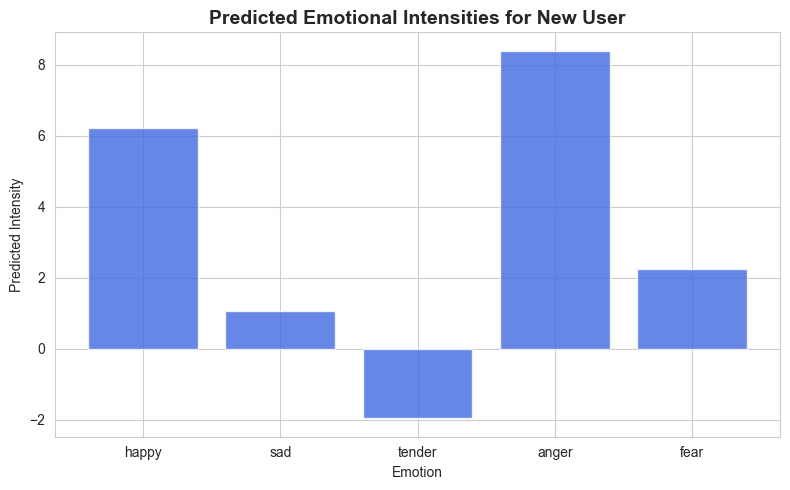

In [2]:
# Load processed dataset
df = pd.read_csv('processed_music_personality_data.csv')
# ============================================================================
# STAGE 8: MULTI-OUTPUT REGRESSION MODEL FOR EMOTIONAL INTENSITY PREDICTION
# ============================================================================

print("\n" + "="*80)
print("STAGE 8: MULTI-OUTPUT REGRESSION MODEL FOR EMOTIONAL INTENSITY PREDICTION")
print("="*80)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Define inputs (personality traits)
X = df[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']]

# Define outputs (emotional intensities)
y = df[['happy', 'sad', 'tender', 'anger', 'fear']]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-Output Random Forest Regression
rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluate model
r2_scores = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]
rmse_scores = [np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i])) for i in range(y.shape[1])]

print("\n--- MODEL EVALUATION ---")
for emotion, r2, rmse in zip(y.columns, r2_scores, rmse_scores):
    print(f"{emotion:10s} | R²: {r2:.3f} | RMSE: {rmse:.3f}")

# ============================================================================
# PREDICT EMOTIONS FOR A NEW USER PROFILE
# ============================================================================
print("\n--- PREDICTING EMOTIONS FOR NEW USER ---")

new_user = pd.DataFrame({
    'Extraversion': [0.75],
    'Agreeableness': [0.65],
    'Conscientiousness': [0.80],
    'Neuroticism': [0.40],
    'Openness': [0.85]
})

new_user_scaled = scaler.transform(new_user)
predicted_emotions = rf_regressor.predict(new_user_scaled)

emotion_result = pd.DataFrame(predicted_emotions, columns=y.columns)
print("\nPredicted Emotional Intensities:")
print(emotion_result.T)

# ============================================================================
# SONG RECOMMENDATION BASED ON EMOTIONAL SIMILARITY
# ============================================================================
print("\n--- SONG RECOMMENDATION BASED ON EMOTIONAL SIMILARITY ---")

song_vectors = df[['happy', 'sad', 'tender', 'anger', 'fear']].values
user_vector = predicted_emotions
similarities = cosine_similarity(song_vectors, user_vector).flatten()

df['similarity_score'] = similarities
recommendations = df.sort_values(by='similarity_score', ascending=False).head(5)

print("\n🎵 TOP 5 RECOMMENDED SONGS BASED ON PERSONALITY PROFILE 🎵")
if 'songId' in df.columns:
    print(recommendations[['songId', 'similarity_score']])
else:
    print(recommendations[['similarity_score', 'happy', 'sad', 'tender', 'anger', 'fear']])
# ============================================================================
# EMOTION VISUALIZATION FOR NEW USER
# ============================================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(emotion_result.columns, emotion_result.iloc[0], color='royalblue', alpha=0.8)
plt.title('Predicted Emotional Intensities for New User', fontsize=14, fontweight='bold')
plt.xlabel('Emotion')
plt.ylabel('Predicted Intensity')
plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression

traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

X = df.drop(columns=traits + ["userId", "songId"], errors="ignore")
y = df['Extraversion']

# Encode categorical columns (like 'Low', 'High', etc.)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Handle missing values (if any)
X = X.fillna(0)

# Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=10)

X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 features:", selected_features)


Top 10 features: Index(['sociability', 'assertiveness', 'energy_level', 'organization',
       'productiveness', 'responsibility', 'anxiety', 'depression',
       'emotional_volatility', 'aesthetic_sensitivity'],
      dtype='object')


In [4]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
feature_importance = {}

for trait in traits:
    X = df.drop(columns=traits + ["userId", "songId"], errors="ignore")
    y = df[trait]
    X = pd.get_dummies(X, drop_first=True)
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Convert categorical columns to numeric
    


    # Mutual info regression
    selector = SelectKBest(score_func=mutual_info_regression, k=10)
    selector.fit(X_scaled, y)

    selected_features = X.columns[selector.get_support()]
    feature_importance[trait] = selected_features

# Display results
for trait, features in feature_importance.items():
    print(f"\nTop 10 features for {trait}:")
    for f in features:
        print("  -", f)



Top 10 features for Extraversion:
  - sociability
  - assertiveness
  - energy_level
  - organization
  - productiveness
  - responsibility
  - anxiety
  - depression
  - emotional_volatility
  - aesthetic_sensitivity

Top 10 features for Agreeableness:
  - sociability
  - assertiveness
  - compassion
  - respectfulness
  - trust
  - organization
  - productiveness
  - depression
  - emotional_volatility
  - aesthetic_sensitivity

Top 10 features for Conscientiousness:
  - sociability
  - assertiveness
  - energy_level
  - organization
  - productiveness
  - responsibility
  - anxiety
  - depression
  - emotional_volatility
  - aesthetic_sensitivity

Top 10 features for Neuroticism:
  - sociability
  - assertiveness
  - energy_level
  - compassion
  - organization
  - productiveness
  - anxiety
  - depression
  - emotional_volatility
  - aesthetic_sensitivity

Top 10 features for Openness:
  - sociability
  - assertiveness
  - energy_level
  - organization
  - productiveness
  - anxie

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Define your consistent top 10 features
top_features = [
    'sociability', 'assertiveness', 'energy_level', 'organization',
    'productiveness', 'responsibility', 'anxiety', 'depression',
    'emotional_volatility', 'aesthetic_sensitivity'
]

# Target traits
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

results = {}

for trait in traits:
    X = df[top_features]
    y = df[trait]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Train models
    models = {
        'LinearRegression': LinearRegression(),
        'RandomForest': RandomForestRegressor(random_state=42)
    }
    
    trait_results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        trait_results[name] = round(r2, 3)
    
    results[trait] = trait_results

# Display results
for trait, scores in results.items():
    print(f"\nTrait: {trait}")
    for model, r2 in scores.items():
        print(f"  {model}: R² = {r2}")



Trait: Extraversion
  LinearRegression: R² = 1.0
  RandomForest: R² = 1.0

Trait: Agreeableness
  LinearRegression: R² = 0.279
  RandomForest: R² = 0.998

Trait: Conscientiousness
  LinearRegression: R² = 1.0
  RandomForest: R² = 1.0

Trait: Neuroticism
  LinearRegression: R² = 1.0
  RandomForest: R² = 1.0

Trait: Openness
  LinearRegression: R² = 0.689
  RandomForest: R² = 1.0


In [6]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# traits list
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

# We'll reuse the same top features you selected
top_features = ['sociability', 'assertiveness', 'energy_level', 'organization',
                'productiveness', 'responsibility', 'anxiety', 'depression',
                'emotional_volatility', 'aesthetic_sensitivity']

# initialize k-fold (5 splits is standard)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for trait in traits:
    print(f"\n=== Trait: {trait} ===")
    X = df[top_features]
    y = df[trait]

    # scale features
    X_scaled = StandardScaler().fit_transform(X)

    models = {
        "LinearRegression": LinearRegression(),
        "RandomForest": RandomForestRegressor(random_state=42)
    }

    for name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
        print(f"{name}: Mean R² = {scores.mean():.3f} | Std = {scores.std():.3f}")



=== Trait: Extraversion ===
LinearRegression: Mean R² = 1.000 | Std = 0.000
RandomForest: Mean R² = 1.000 | Std = 0.000

=== Trait: Agreeableness ===
LinearRegression: Mean R² = 0.289 | Std = 0.023
RandomForest: Mean R² = 1.000 | Std = 0.001

=== Trait: Conscientiousness ===
LinearRegression: Mean R² = 1.000 | Std = 0.000
RandomForest: Mean R² = 1.000 | Std = 0.000

=== Trait: Neuroticism ===
LinearRegression: Mean R² = 1.000 | Std = 0.000
RandomForest: Mean R² = 1.000 | Std = 0.000

=== Trait: Openness ===
LinearRegression: Mean R² = 0.704 | Std = 0.013
RandomForest: Mean R² = 1.000 | Std = 0.000


                           Extraversion  Agreeableness  Conscientiousness  \
Agreeableness                 -0.105363       1.000000           0.253886   
Conscientiousness              0.227002       0.253886           1.000000   
Extraversion                   1.000000      -0.105363           0.227002   
Neuroticism                   -0.347169      -0.053895          -0.235703   
Openness                       0.317434       0.107816           0.060568   
Q1                            -0.008642       0.045266          -0.066153   
Q2                            -0.023758       0.049167          -0.052248   
Q3                            -0.030469       0.092281          -0.020764   
activity                      -0.013868      -0.039072          -0.011298   
aesthetic_sensitivity          0.074162       0.086679          -0.009636   
anger                         -0.005035      -0.020065          -0.007807   
anxiety                       -0.338918       0.076162          -0.093611   

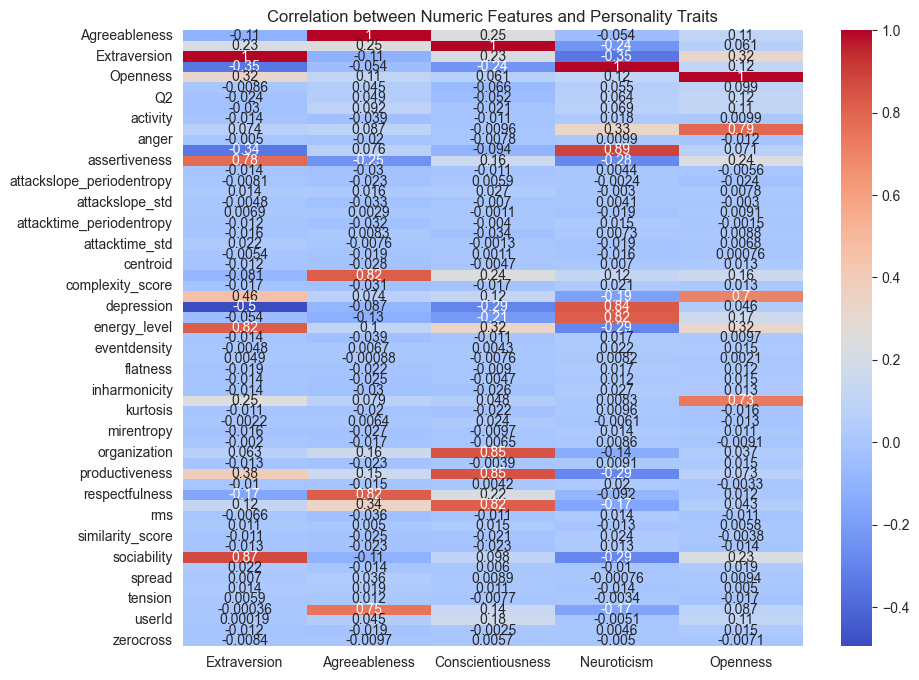

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with traits (if traits are numeric too)
corr = numeric_df.corr()[['Extraversion','Agreeableness','Conscientiousness','Neuroticism','Openness']].sort_index()
print(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation between Numeric Features and Personality Traits")
plt.show()


In [8]:
top_features = {}
for trait in ['Extraversion','Agreeableness','Conscientiousness','Neuroticism','Openness']:
    top = corr[trait].abs().sort_values(ascending=False).head(10)
    top_features[trait] = top.index.tolist()
    print(f"\nTop 10 features for {trait}:\n{top}")



Top 10 features for Extraversion:
Extraversion            1.000000
sociability             0.874649
energy_level            0.823958
assertiveness           0.782486
depression              0.495409
creative_imagination    0.458382
productiveness          0.384188
Neuroticism             0.347169
anxiety                 0.338918
Openness                0.317434
Name: Extraversion, dtype: float64

Top 10 features for Agreeableness:
Agreeableness           1.000000
respectfulness          0.824135
compassion              0.820295
trust                   0.748928
responsibility          0.340374
Conscientiousness       0.253886
assertiveness           0.245374
organization            0.161188
productiveness          0.153778
emotional_volatility    0.125650
Name: Agreeableness, dtype: float64

Top 10 features for Conscientiousness:
Conscientiousness    1.000000
productiveness       0.848707
organization         0.847103
responsibility       0.818569
energy_level         0.321181
depressi

In [9]:
trait_related = {
    "Extraversion": ["sociability", "assertiveness", "energy_level"],
    "Agreeableness": ["trust", "respectfulness", "compassion"],
    "Conscientiousness": ["responsibility", "organization", "productiveness"],
    "Neuroticism": ["anxiety", "depression", "emotional_volatility"],
    "Openness": ["creative_imagination", "intellectual_curiosity", "aesthetic_sensitivity"]
}
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

trait_related = {
    "Extraversion": ["sociability", "assertiveness", "energy_level"],
    "Agreeableness": ["trust", "respectfulness", "compassion"],
    "Conscientiousness": ["responsibility", "organization", "productiveness"],
    "Neuroticism": ["anxiety", "depression", "emotional_volatility"],
    "Openness": ["creative_imagination", "intellectual_curiosity", "aesthetic_sensitivity"]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for trait in traits:
    print(f"\n=== Trait: {trait} ===")
    
    # Drop the target + its related subtraits
    X = df.drop(columns=traits + trait_related[trait] + ["userId", "songId"], errors="ignore")
    y = df[trait]

    # Convert any categorical variables to numeric
    X = pd.get_dummies(X, drop_first=True)
    
    # Scale
    X_scaled = StandardScaler().fit_transform(X)

    # Models
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForest": RandomForestRegressor(random_state=42)
    }

    for name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
        print(f"{name}: Mean R² = {scores.mean():.3f} | Std = {scores.std():.3f}")



=== Trait: Extraversion ===
LinearRegression: Mean R² = 0.756 | Std = 0.006
RandomForest: Mean R² = 0.999 | Std = 0.001

=== Trait: Agreeableness ===
LinearRegression: Mean R² = 0.697 | Std = 0.011
RandomForest: Mean R² = 1.000 | Std = 0.000

=== Trait: Conscientiousness ===
LinearRegression: Mean R² = 0.685 | Std = 0.031
RandomForest: Mean R² = 1.000 | Std = 0.000

=== Trait: Neuroticism ===
LinearRegression: Mean R² = 0.762 | Std = 0.007
RandomForest: Mean R² = 1.000 | Std = 0.000

=== Trait: Openness ===
LinearRegression: Mean R² = 0.685 | Std = 0.017
RandomForest: Mean R² = 1.000 | Std = 0.000


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

trait_related = {
    'Extraversion': ['sociability', 'assertiveness', 'energy_level'],
    'Agreeableness': ['trust', 'morality', 'altruism', 'cooperation', 'modesty', 'sympathy'],
    'Conscientiousness': ['self_efficacy', 'orderliness', 'dutifulness', 'achievement_striving', 'self_discipline', 'cautiousness'],
    'Neuroticism': ['anxiety', 'anger', 'depression', 'self_consciousness', 'immoderation', 'vulnerability'],
    'Openness': ['imagination', 'artistic_interest', 'emotionality', 'adventurousness', 'intellect', 'liberalism']
}

# --- 1️⃣ Remove overfitting columns ---
remove_cols = []
for t in traits:
    remove_cols += trait_related[t]
remove_cols += ["userId", "songId"]

df_clean = df.drop(columns=remove_cols, errors="ignore")

print("Remaining features after cleaning:", df_clean.columns.tolist())

# --- 2️⃣ Convert categorical → numeric (fix for 'Low', 'Medium', etc.)
df_corr_ready = pd.get_dummies(df_clean, drop_first=True)

# --- 3️⃣ Find top safe correlated features ---
top_features = set()
for t in traits:
    if t not in df_corr_ready.columns:
        print(f"⚠️ Skipping {t} — not in df_corr_ready.")
        continue
    corr = df_corr_ready.corr()[t].drop(traits, errors='ignore')
    top = corr.abs().sort_values(ascending=False).head(3)
    print(f"\nTop features for {t}:\n{top}\n")
    top_features.update(top.index)

top_features = list(top_features)
print("\n✅ Final Selected Safe Features:", top_features)

# --- 4️⃣ Train clean models ---
models = {}
r2_scores = {}

for t in traits:
    X = df_corr_ready[top_features]
    y = df_corr_ready[t]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    models[t] = model
    r2_scores[t] = r2

print("\n📊 Model R² Scores (No Overfitting):")
for t, r2 in r2_scores.items():
    print(f"{t}: {r2:.4f}")


Remaining features after cleaning: ['Q1', 'Q2', 'Q3', 'Extraversion', 'Agreeableness', 'compassion', 'respectfulness', 'Conscientiousness', 'organization', 'productiveness', 'responsibility', 'Neuroticism', 'emotional_volatility', 'Openness', 'intellectual_curiosity', 'aesthetic_sensitivity', 'creative_imagination', 'rms', 'lowenergy', 'eventdensity', 'pulseclarity', 'attacktime_mean', 'attacktime_std', 'attacktime_slope', 'attacktime_periodentropy', 'attackslope_mean', 'attackslope_std', 'attackslope_slope', 'attackslope_periodentropy', 'zerocross', 'brightness', 'centroid', 'spread', 'skewness', 'kurtosis', 'flatness', 'mirentropy', 'inharmonicity', 'activity', 'valence', 'tension', 'happy', 'sad', 'tender', 'fear', 'Extraversion_group', 'Agreeableness_group', 'Conscientiousness_group', 'Neuroticism_group', 'Openness_group', 'positive_emotion_score', 'negative_emotion_score', 'energy_score', 'complexity_score', 'similarity_score']

Top features for Extraversion:
Extraversion_group_Lo

In [11]:
# Correlation matrix
corr = df_corr_ready.corr()

# Sort correlations with each target
print("\nTop correlations with Conscientiousness:")
print(corr['Conscientiousness'].sort_values(ascending=False).head(15))

print("\nTop correlations with Openness:")
print(corr['Openness'].sort_values(ascending=False).head(15))



Top correlations with Conscientiousness:
Conscientiousness         1.000000
productiveness            0.848707
organization              0.847103
responsibility            0.818569
Agreeableness             0.253886
compassion                0.242268
Extraversion              0.227002
respectfulness            0.218139
creative_imagination      0.120508
Neuroticism_group_Low     0.097878
Openness                  0.060568
intellectual_curiosity    0.047758
attackslope_slope         0.026538
lowenergy                 0.023927
sad                       0.014908
Name: Conscientiousness, dtype: float64

Top correlations with Openness:
Openness                  1.000000
aesthetic_sensitivity     0.790127
intellectual_curiosity    0.732072
creative_imagination      0.703772
Extraversion              0.317434
emotional_volatility      0.174294
compassion                0.158663
Q2                        0.119033
Neuroticism               0.115457
Q3                        0.110313
Agreeablen

In [12]:
# 🧹 Remove strongly overfitting subfeatures
overfit_features = [
    "productiveness", "organization", "responsibility",
    "aesthetic_sensitivity", "intellectual_curiosity", "creative_imagination"
]

df_safe = df_corr_ready.drop(columns=overfit_features, errors="ignore")

# ✅ Recompute correlations to find new top features
top_features_new = set()
for t in traits:
    if t not in df_safe.columns:
        continue
    corr = df_safe.corr()[t].drop(traits, errors='ignore')
    top = corr.abs().sort_values(ascending=False).head(3)
    print(f"\nTop features for {t}:\n{top}\n")
    top_features_new.update(top.index)

top_features_new = list(top_features_new)
print("\n✅ Final Selected Non-Overfitting Features:", top_features_new)

# 🎯 Retrain Linear Regression models
models_new = {}
r2_scores_new = {}

for t in traits:
    X = df_safe[top_features_new]
    y = df_safe[t]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    models_new[t] = model
    r2_scores_new[t] = r2

# 📊 Results
print("\n📊 Updated Model R² Scores (After Overfitting Fix):")
for t, r2 in r2_scores_new.items():
    print(f"{t}: {r2:.4f}")



Top features for Extraversion:
Extraversion_group_Low    0.827747
Openness_group_Low        0.330331
Neuroticism_group_Low     0.228844
Name: Extraversion, dtype: float64


Top features for Agreeableness:
respectfulness             0.824135
compassion                 0.820295
Agreeableness_group_Low    0.805995
Name: Agreeableness, dtype: float64


Top features for Conscientiousness:
Conscientiousness_group_Low    0.798719
Extraversion_group_Low         0.254242
compassion                     0.242268
Name: Conscientiousness, dtype: float64


Top features for Neuroticism:
emotional_volatility      0.819152
Neuroticism_group_Low     0.811839
Extraversion_group_Low    0.328214
Name: Neuroticism, dtype: float64


Top features for Openness:
Openness_group_Low        0.803888
Extraversion_group_Low    0.236820
emotional_volatility      0.174294
Name: Openness, dtype: float64


✅ Final Selected Non-Overfitting Features: ['emotional_volatility', 'respectfulness', 'Agreeableness_group_Low', '

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

results_new = {}

for t in traits:
    if t not in df_safe.columns:
        print(f"⚠️ Skipping {t} — not found in df_safe")
        continue

    X = df_safe[top_features_new]
    y = df_safe[t]

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Retrain model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute R² for both sets
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    results_new[t] = {"Train R²": r2_train, "Test R²": r2_test}

    # ✅ Save model
    with open(f"{t}_final_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # ✅ NEW: Save the exact feature names used in training
    with open(f"{t}_features.pkl", "wb") as f:
        pickle.dump(X_train.columns.tolist(), f)

# 📊 Display final results
print("\n📈 Final Validation Results (After Overfitting Fix):")
for t, scores in results_new.items():
    print(f"{t}: Train R²={scores['Train R²']:.3f}, Test R²={scores['Test R²']:.3f}")



📈 Final Validation Results (After Overfitting Fix):
Extraversion: Train R²=0.708, Test R²=0.716
Agreeableness: Train R²=0.899, Test R²=0.899
Conscientiousness: Train R²=0.669, Test R²=0.681
Neuroticism: Train R²=0.840, Test R²=0.843
Openness: Train R²=0.659, Test R²=0.635


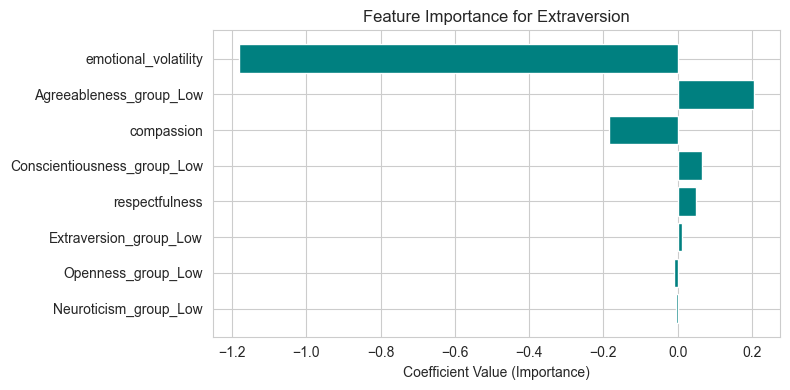


🧩 Extraversion Feature Importance:
emotional_volatility      → -1.1828
Agreeableness_group_Low   → 0.2060
compassion                → -0.1837
Conscientiousness_group_Low → 0.0663
respectfulness            → 0.0505
Extraversion_group_Low    → 0.0106
Openness_group_Low        → -0.0100
Neuroticism_group_Low     → -0.0054


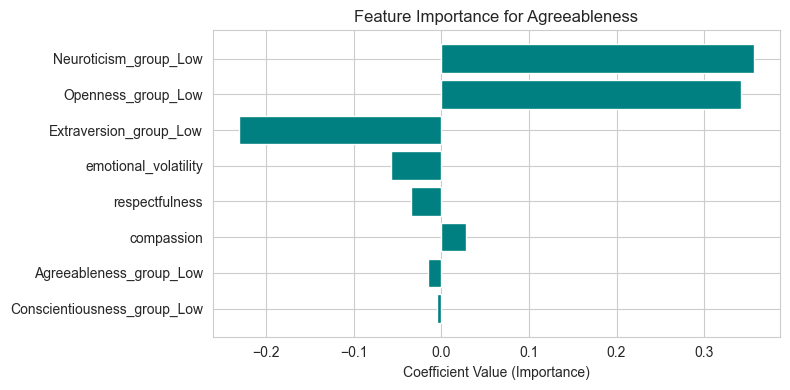


🧩 Agreeableness Feature Importance:
Neuroticism_group_Low     → 0.3572
Openness_group_Low        → 0.3422
Extraversion_group_Low    → -0.2315
emotional_volatility      → -0.0572
respectfulness            → -0.0349
compassion                → 0.0283
Agreeableness_group_Low   → -0.0147
Conscientiousness_group_Low → -0.0048


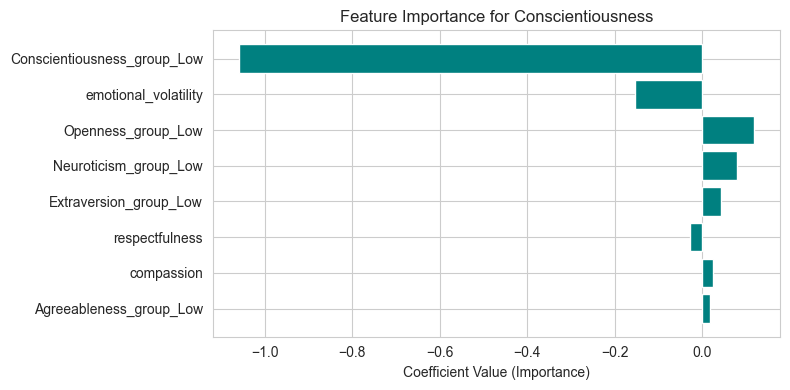


🧩 Conscientiousness Feature Importance:
Conscientiousness_group_Low → -1.0598
emotional_volatility      → -0.1525
Openness_group_Low        → 0.1194
Neuroticism_group_Low     → 0.0795
Extraversion_group_Low    → 0.0428
respectfulness            → -0.0272
compassion                → 0.0244
Agreeableness_group_Low   → 0.0184


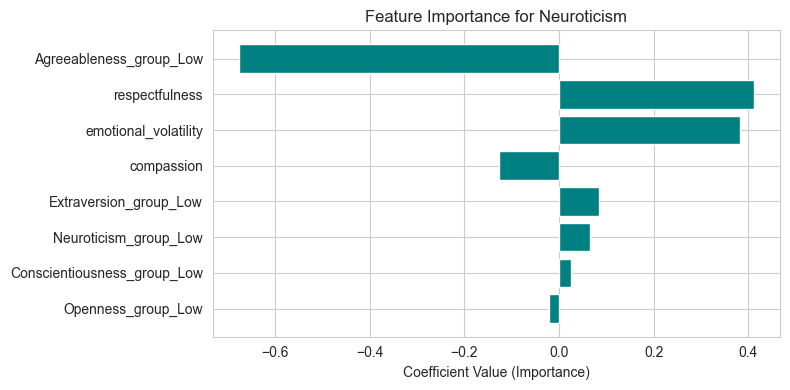


🧩 Neuroticism Feature Importance:
Agreeableness_group_Low   → -0.6767
respectfulness            → 0.4123
emotional_volatility      → 0.3825
compassion                → -0.1262
Extraversion_group_Low    → 0.0852
Neuroticism_group_Low     → 0.0657
Conscientiousness_group_Low → 0.0260
Openness_group_Low        → -0.0217


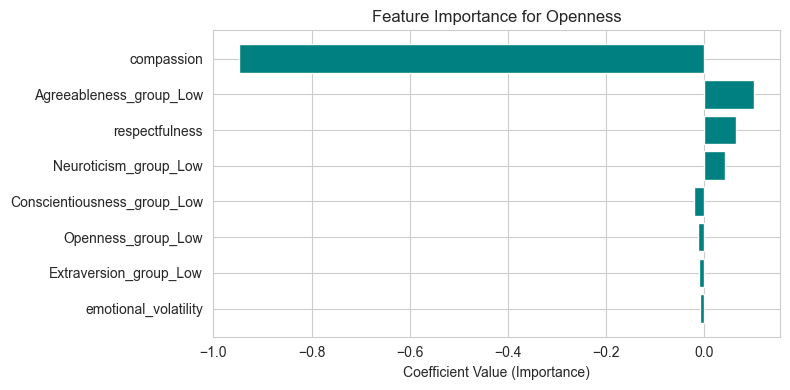


🧩 Openness Feature Importance:
compassion                → -0.9489
Agreeableness_group_Low   → 0.1013
respectfulness            → 0.0635
Neuroticism_group_Low     → 0.0415
Conscientiousness_group_Low → -0.0219
Openness_group_Low        → -0.0142
Extraversion_group_Low    → -0.0107
emotional_volatility      → -0.0090


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 📊 Feature importance for Linear Regression
for trait in traits:
    model = models_new[trait]
    coefs = model.coef_
    features = top_features_new

    # Sort features by importance
    sorted_idx = np.argsort(np.abs(coefs))[::-1]
    sorted_features = np.array(features)[sorted_idx]
    sorted_coefs = coefs[sorted_idx]

    plt.figure(figsize=(8,4))
    plt.barh(sorted_features, sorted_coefs, color='teal')
    plt.xlabel("Coefficient Value (Importance)")
    plt.title(f"Feature Importance for {trait}")
    plt.gca().invert_yaxis()  # Highest importance on top
    plt.tight_layout()
    plt.show()

    print(f"\n🧩 {trait} Feature Importance:")
    for f, c in zip(sorted_features, sorted_coefs):
        print(f"{f:25s} → {c:.4f}")


In [21]:
import pickle
import pandas as pd

traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]

sample_input = pd.DataFrame([[ 
    0.66,  # respectfulness
    1,     # Openness_group_Low
    0,     # Extraversion_group_Low
    1,     # Agreeableness_group_Low
    0,     # Conscientiousness_group_Low
    0.72,  # compassion
    0,     # Neuroticism_group_Low
    0.45   # emotional_volatility
]], columns=[
    "respectfulness", "Openness_group_Low", "Extraversion_group_Low",
    "Agreeableness_group_Low", "Conscientiousness_group_Low",
    "compassion", "Neuroticism_group_Low", "emotional_volatility"
])

print("\n🎯 Final Model Predictions on New Input:")
for t in traits:
    try:
        with open(f"{t}_final_model.pkl", "rb") as f:
            model = pickle.load(f)
        
        # Align sample features
        sample_aligned = sample_input.reindex(columns=model.feature_names_in_, fill_value=0)
        
        pred = model.predict(sample_aligned)[0]
        print(f"{t}: {pred:.3f}")
    except FileNotFoundError:
        print(f"⚠️ Model for {t} not found!")



🎯 Final Model Predictions on New Input:
Extraversion: 3.376
Agreeableness: 1.357
Conscientiousness: 3.323
Neuroticism: 2.130
Openness: 3.131


In [22]:
import pickle
import pandas as pd

# --- Load all 5 trained models ---
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
models = {}

for t in traits:
    with open(f"{t}_final_model.pkl", "rb") as f:
        models[t] = pickle.load(f)

# --- Define unified prediction function ---
def predict_personality(sample_input):
    results = {}
    for t, model in models.items():
        pred = model.predict(sample_input)[0]
        results[t] = round(pred, 3)
    return results

# --- New Example Input (simulating confident, kind, organized person) ---
sample_input = pd.DataFrame([[  
    0.9,   # respectfulness — very high  
    0,     # Openness_group_Low — not low, open-minded  
    0,     # Extraversion_group_Low — not low, extroverted  
    0,     # Agreeableness_group_Low — not low, friendly  
    0,     # Conscientiousness_group_Low — not low, responsible  
    0.85,  # compassion — high empathy  
    0,     # Neuroticism_group_Low — not low (emotionally stable)  
    0.2    # emotional_volatility — low volatility  
]], columns=top_features_new)

# --- Get unified prediction ---
final_predictions = predict_personality(sample_input)

print("\n🧠 Final Combined Personality Predictions:")
for t, val in final_predictions.items():
    print(f"{t}: {val}")



🧠 Final Combined Personality Predictions:
Extraversion: 3.519
Agreeableness: 1.703
Conscientiousness: 3.3
Neuroticism: 2.086
Openness: 4.067
